In [1]:
from TotalSolver import *
from TotalSolver import Item
from TotalSolver import GridSearcher

from ClassicalSolver import *
from ClassicalSolver import dynamic_programming

from Testing.InstanceGenerator.InstanceGenerator import create_instance

import numpy as np
import time
import sys
import os

Object 1:
   - profit: 10
   - weight: 15


In [2]:
def main(n_qubits, print_bool=True):
    profits, weights, max_weights = create_instance("strong_cor", n_qubits, 1000)
    max_weight = max_weights[len(max_weights) // 2]
    items = [Item(i, profits[i], weights[i]) for i in range(len(profits))]
    if print_bool:
        print("Collecting item-data from Input.xslx...", end=" ")
        #time.sleep(4)
        print("Done")
        for item in items:
            print(item)
        #time.sleep(1)
    quantum_solver = GridSearcher(items, max_weight, [-0.5 for _ in items], 10, 10, 1, "Copula", "smoothened")
    if print_bool:
        print("Calculating optimal solution: ...")
    quantum_sol_value = quantum_solver.get_max_result()
    quantum_sol_string = quantum_solver.get_max_string()
    classical_sol_value = dynamic_programming(items, max_weight)
    if print_bool:
        print("Done")
        print("Optimal quantum value: {} (classical: {})".format(str(quantum_sol_value), str(classical_sol_value)))
        print("Optimal item combinations: {}".format(quantum_sol_string))


In [3]:
def find_run_times(end):
    for i in range(28, max(end, 10)):
        print(i)
        t1 = time.time()
        main(i, print_bool=False)
        print("Qubits: {}".format(str(i)))
        runtime = time.time() - t1
        print("Laufzeit: {}".format(str(runtime)))
        print("")

28


KeyboardInterrupt: 

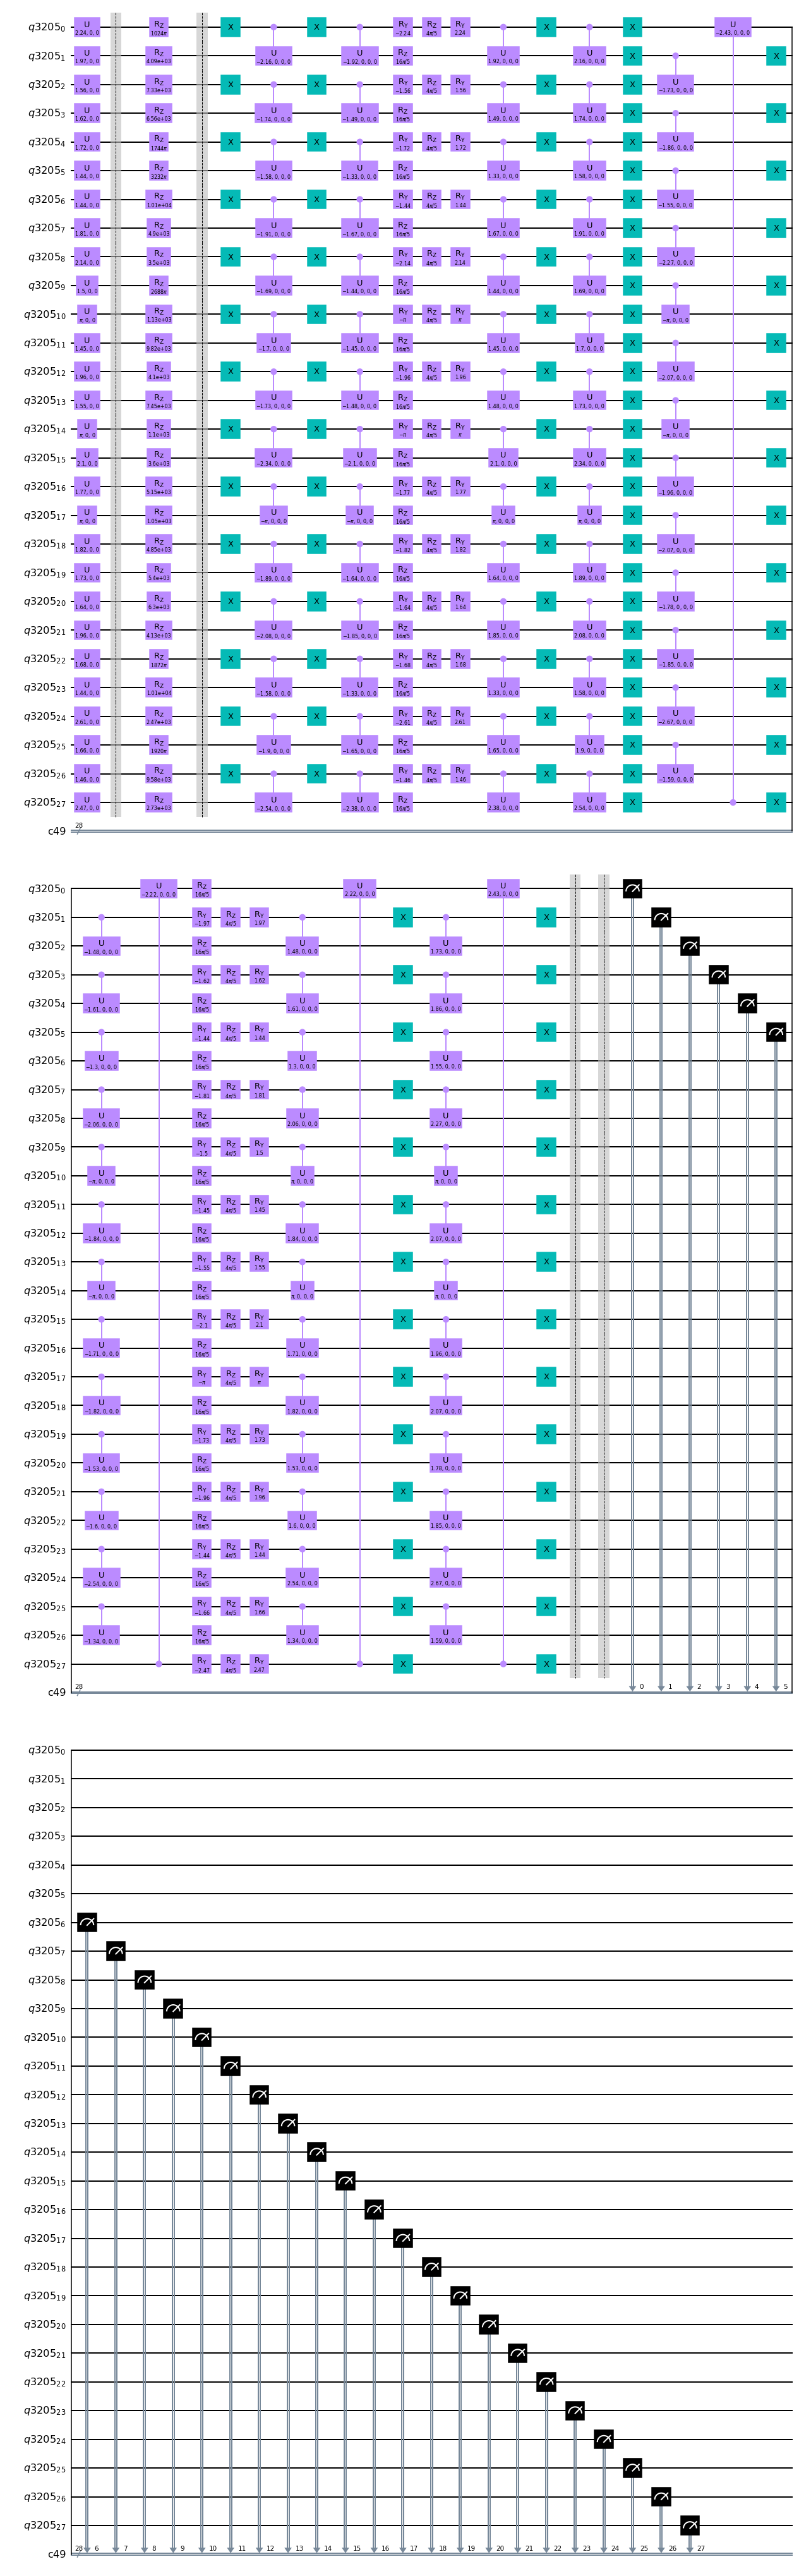

In [4]:
find_run_times(50)